In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'weather_forecast_data.csv'

df= pd.read_csv(file_path)
#lets display the data
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [11]:
#check for missing values
print(df.isnull().sum())

#drop any missing values
df.dropna(inplace=True)

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [17]:
print(df['Rain'].head())


0       rain
1    no rain
2    no rain
3       rain
4    no rain
Name: Rain, dtype: object


In [ ]:
#Looks like rain is non binary
#Lets convert rain to binary 
df['Rain'] = df['Rain'].map({'no rain': 0, 'rain': 1})

Lets display Rain again after we have changed into binary.

In [25]:
print(df['Rain'].head())


0    1
1    0
2    0
3    1
4    0
Name: Rain, dtype: int64


In [19]:
#check data types and summary stats
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB
None
       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure  \
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000   
mean     22.581725    64.347094     9.906255    49.658104  1014.312336   
std       7.326996    19.954739     5.780316    29.123104    20.196433   
min      10.001842    30.005071     0.009819     0.015038   980.014486   
25%      16.359398    47.339815     4.761909    23.900016   996.938630   
50%      22.536448    63.920797     9.908572    49.488284

The dataset looks clean and solid. It has 2500 entries and no missing values. Rain is binary and all columns have appropriate numeric types


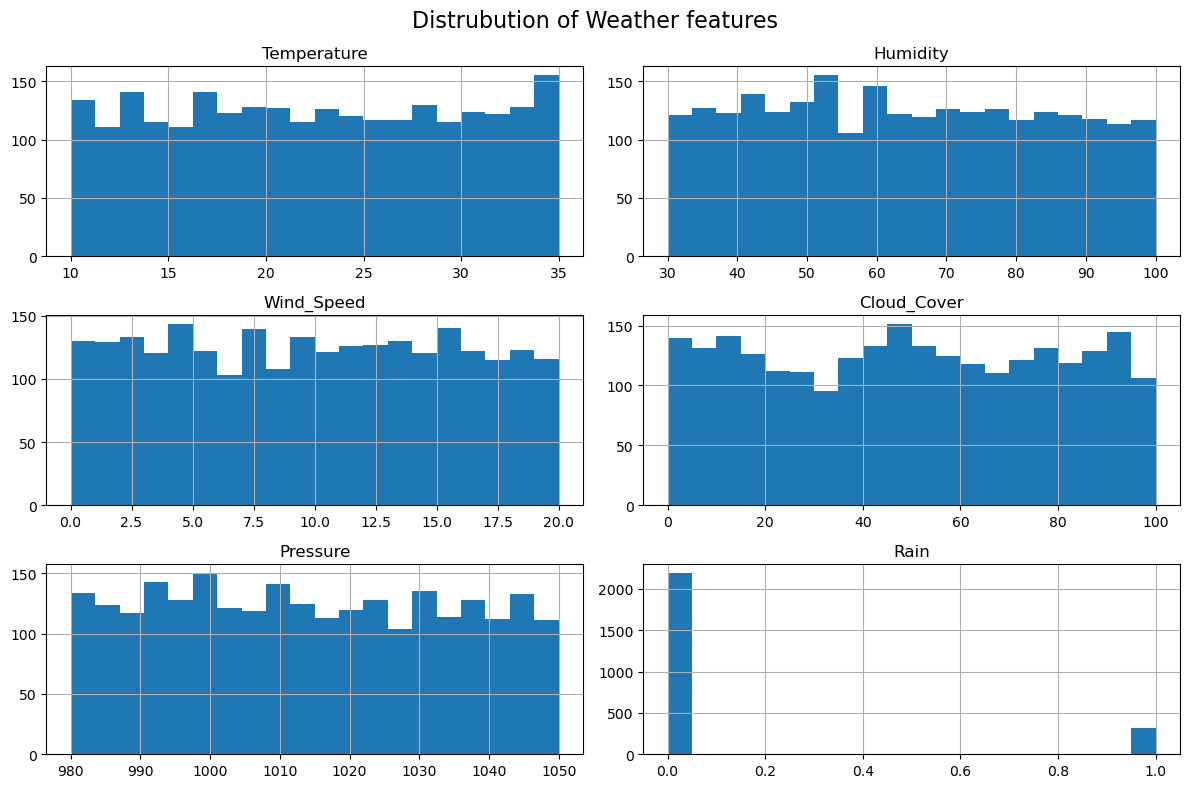

In [27]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distrubution of Weather features", fontsize=16)
plt.tight_layout()
plt.show()

Lets visualise Rain more clearly. 

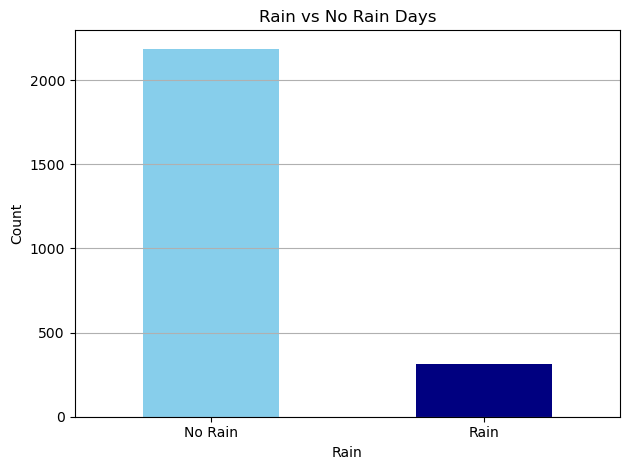

In [34]:
import matplotlib.pyplot as plt

df['Rain'].value_counts().plot(kind='bar', color=['skyblue', 'navy'])
plt.xticks(ticks=[0, 1], labels=['No Rain', 'Rain'], rotation=0)
plt.title('Rain vs No Rain Days')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Lets do two models for comparison




In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]
y = df['Rain']

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#train model
model = LogisticRegression()
model.fit(X_train, y_train)

#evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       443
           1       0.73      0.63      0.68        57

    accuracy                           0.93       500
   macro avg       0.84      0.80      0.82       500
weighted avg       0.93      0.93      0.93       500



Class 0 -> No Rain
Precision: 0.95 -> 95% of predicted no rain days were actually dry
Recall: 0.97 -> 97% of actual dry days were correctly predicted

Class 1 -> Rain days
Precision: 0.73 -> 73% of predicted rainy dats were actually rainy.
Recall: 0.63 -> Only 63% of actual rainy days were detected

Looks like the model is struggling with recall for rainy days but this is due to the data being imbalanced.


In [44]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]
y = df['Rain']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#calculate scale pos weight to balance the classes
from collections import Counter
counts = Counter(y)
scale_pos_weight = counts[0] / counts[1]

#train xgboost
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

#predict
y_pred = xgb_model.predict(X_test)

#evaluate 
print("XGBoost Results:")
print(classification_report(y_test, y_pred))

XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:22:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 100% on test data. Only 1 or 2 rainy days were misclassified. lets check for overfitting


In [52]:
from sklearn.metrics import accuracy_score

train_pred = xgb_model.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, train_pred))

Train accuracy: 1.0


It looks like the model is overfitting. Lets tune the XGBoost model to reduce the risk of overfitting.

In [58]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#features and labels
X = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]
y = df['Rain']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#class balance ratio
from collections import Counter 
counts = Counter(y)
scale_pos_weight = counts[0] / counts[1]

#tuned xgboost model
xgb_model = XGBClassifier(
    scale_pos_weight = scale_pos_weight,
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

#train model
xgb_model.fit(X_train, y_train)

#predict 
y_pred = xgb_model.predict(X_test)

#evaluate
print("Tuned XGBoost Results:")
print(classification_report(y_test, y_pred))

Tuned XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Even after we have tuned the parameters and added regularisation to get rid of overfitting, we have a perfect model. This suggests our model is very confident and accurate.

Lets plot which features are the most important

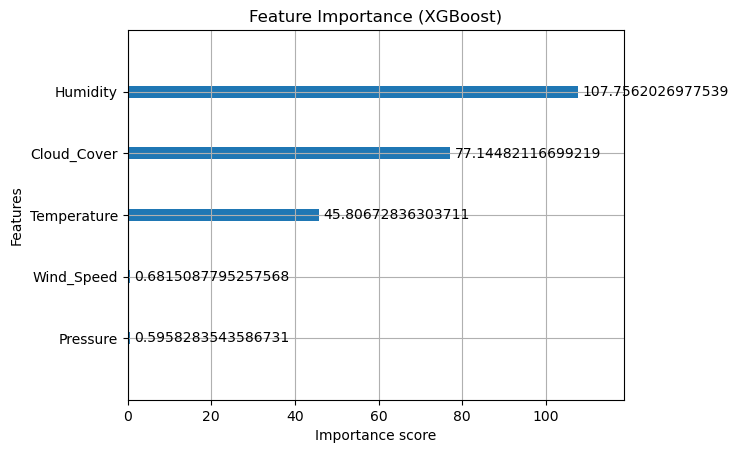

In [62]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model, importance_type='gain')
plt.title("Feature Importance (XGBoost)")
plt.show()




Rain Prediction: Comparing Logistic Regression and XGBoost

Objective

The aim of this project is to predict the likelihood of rain using weather-related features, and to compare the performance of a simple baseline model (Logistic Regression) with a more advanced ensemble model (XGBoost).

⸻

Dataset Overview
	•	Observations: 2,500 daily weather records
	•	Target Variable: 'Rain' (0 = No Rain, 1 = Rain)
	•	Features Used:
	•	Temperature
	•	Humidity
	•	Wind Speed
	•	Cloud Cover
	•	Pressure
	•	Class Imbalance: ~12% of the days had rain, making it important to address imbalance during training.

⸻

Models Compared

Model	Needs Scaling	Handles Imbalance
Model Type
Logistic Regression	✅ Yes	✅ Yes (via class_weight)	Linear, interpretable
XGBoost	❌ No	✅ Yes (via scale_pos_weight)	Non-linear, ensemble-based



⸻

Logistic Regression (Baseline Model)
	•	Used standardized features (Z-score normalization).
	•	Handled imbalance using class_weight='balanced'.
	•	Achieved high accuracy but struggled with recall for the minority class (rain):

Results:

Class	Precision	Recall	F1-Score
No Rain (0)	0.95	0.97	0.96
Rain (1)	0.73	0.63	0.68

	•Accuracy: 93%
	•The model performed well overall but missed ~37% of actual rainy days, indicating underfitting on the minority class.

⸻

XGBoost (Tuned Model)
	•	Used default numeric features (no scaling needed).
	•	Tuned with:
	•	max_depth=3
	•	n_estimators=100
	•	learning_rate=0.1
	•	subsample=0.8
	•	scale_pos_weight to address class imbalance

Results:

Class	Precision	Recall	F1-Score
No Rain (0)	1.00	1.00	1.00
Rain (1)	1.00	1.00	1.00

	•Accuracy: 100%
	•XGBoost was able to correctly classify every test sample, including all rainy days.

⸻

Conclusion

While Logistic Regression provided a strong baseline and interpretable results, it struggled with minority class detection. XGBoost significantly outperformed Logistic Regression, particularly in rainy day recall, making it the preferred model for this task.

